<a href="https://colab.research.google.com/github/MuhammadSafeer786/My-PyTorch-Journey/blob/main/Chapter_02_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [ ]:
import torch
from torch import nn # all building blockes for neural network
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

Trying to create our own dataset by **Linear Regression** Formula

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
train_split = int(0.8 * len(X)) # no. of samples for training
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))

  # plot training data in green
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

  # plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=20, label="Testing data")

  if predictions is not None:
    # plot predictions in blue
    plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")

  # show legend
  plt.legend(prop={"size": 20})

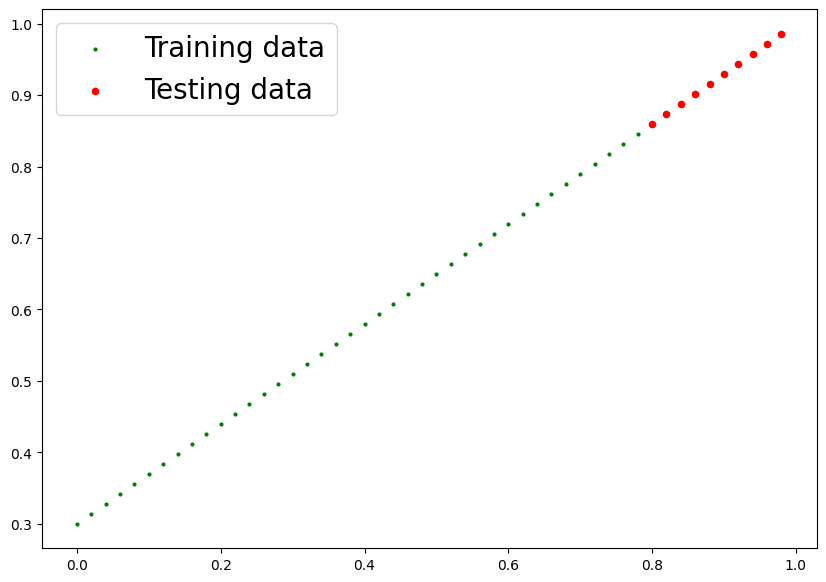

In [ ]:
plot_predictions()

# Building Model
Must watch these (for me only):

Gradient descent - https://youtu.be/IHZwWFHWa-w

Backpropagation - https://youtu.be/Ilg3gGewQ5U


In [ ]:
from torch import nn
class CustomLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward pass method in linear regression method
    def forward(self, x: torch.Tensor) -> torch.Tensor: # type hint / annotation, means dtype of x should be torch.Tensor and -> means return type should be as specified after this symbol
      return self.weights * x + self.bias

## PyTorch cheat sheet
https://pytorch.org/tutorials/beginner/ptcheat.html

# Check Model contents

In [ ]:
torch.manual_seed(42)
model = CustomLinearRegression()

list(model.parameters()) # model.parameters() is an pointer so i converted it to list for visualizing

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])